### Hypothesis: compared to energy, fat and protein have more cases where foods contain too low protein / too low fat to be relevant

### Hypothesis: in protein/fat context-added trials, improvement on lower-protein/lower-fat foods is less than improvement on higher-protein/higher-fat foods

In [ ]:
from multi_nutrient.analysis import *
from multi_nutrient.eval import *
import matplotlib.pyplot as plt

In [23]:
def plot_hists(path):
    nb_sub_laya = pd.read_csv(path)

    nutrients = {"carb" : (0,0), "protein" : (0,1), "fat" : (1,0) , "energy" : (1,1)}
    for nutrient in nutrients:
        nb_sub_laya[nutrient] = nb_sub_laya[nutrient].apply(process_gt)

    figs, axes = plt.subplots(2,2, figsize=(12,8))
    for nutrient in nutrients:
        i = nutrients[nutrient][0]
        j = nutrients[nutrient][1]
        axes[i, j].hist(nb_sub_laya[nutrient], bins=100, edgecolor="black")
        axes[i, j].set_title(f"Distribution of {nutrient}")
        axes[i, j].set_xlabel(nutrient)
        axes[i, j].set_ylabel("count")

    plt.tight_layout()
    plt.show()

    for nutrient in nutrients:
        print(nutrient, (nb_sub_laya[nutrient] == 0).sum())

In [33]:
def plot_hists(path):
    nb_sub_laya = pd.read_csv(path)

    for nutrient in ["carb", "protein", "fat", "energy"]:
        nb_sub_laya[nutrient] = nb_sub_laya[nutrient].apply(process_gt)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # --- Carb ---
    axes[0, 0].hist(
        nb_sub_laya["carb"].dropna(),
        bins=range(0, 401, 4),  
        edgecolor="black"
    )
    axes[0, 0].set_xlim(0, 400)   # x-axis range
    axes[0, 0].set_title("Distribution of carb")
    axes[0, 0].set_xlabel("carb")
    axes[0, 0].set_ylabel("count")

    # --- Protein ---
    axes[0, 1].hist(
        nb_sub_laya["protein"].dropna(),
        bins=range(0, 101, 1),  
        edgecolor="black"
    )
    axes[0, 1].set_xlim(0, 100)
    axes[0, 1].set_title("Distribution of protein")
    axes[0, 1].set_xlabel("protein")
    axes[0, 1].set_ylabel("count")

    # --- Fat ---
    axes[1, 0].hist(
        nb_sub_laya["fat"].dropna(),
        bins=range(0, 101, 1),  
        edgecolor="black"
    )
    axes[1, 0].set_xlim(0, 100)
    axes[1, 0].set_title("Distribution of fat")
    axes[1, 0].set_xlabel("fat")
    axes[1, 0].set_ylabel("count")

    # --- Energy ---
    axes[1, 1].hist(
        nb_sub_laya["energy"].dropna(),
        bins=range(0, 2001, 20),  
        edgecolor="black"
    )
    axes[1, 1].set_xlim(0, 2000)
    axes[1, 1].set_title("Distribution of energy")
    axes[1, 1].set_xlabel("energy")
    axes[1, 1].set_ylabel("count")

    plt.tight_layout()
    plt.show()

    # count zeros
    for nutrient in ["carb", "protein", "fat", "energy"]:
        print(nutrient, (nb_sub_laya[nutrient] == 0).sum())

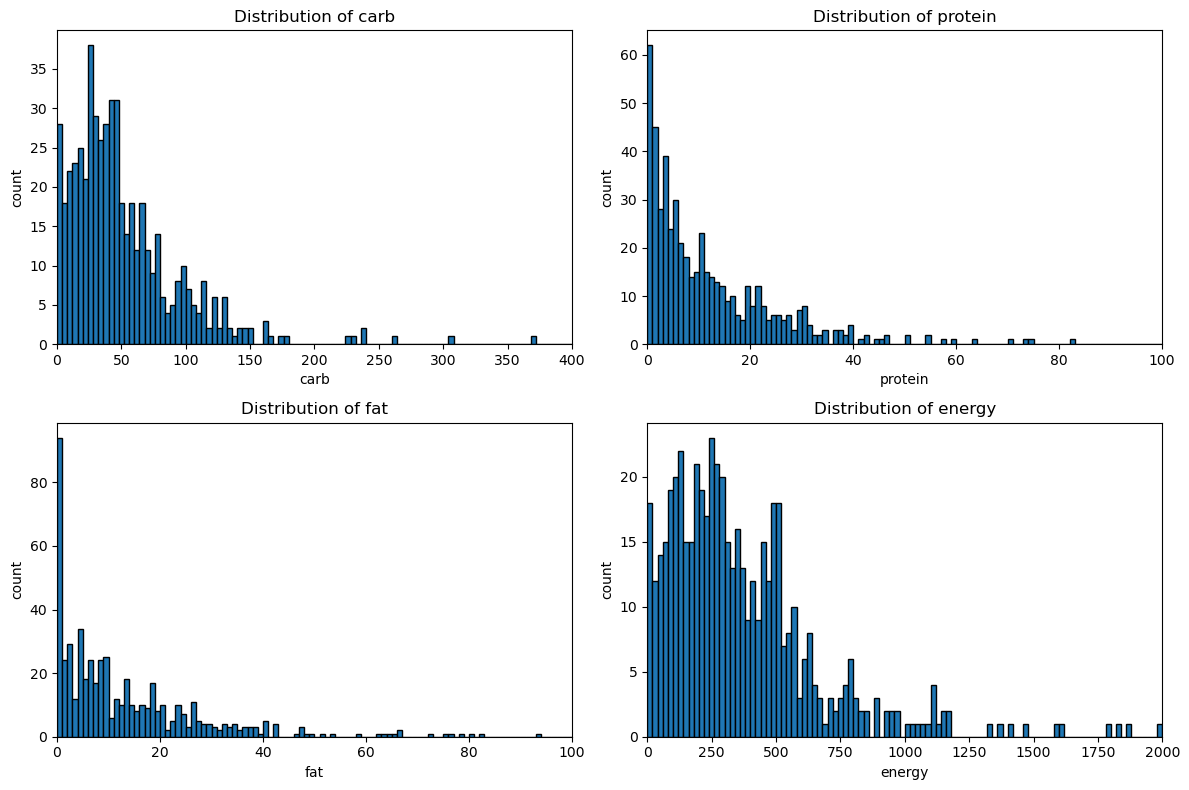

carb 9
protein 19
fat 21
energy 6


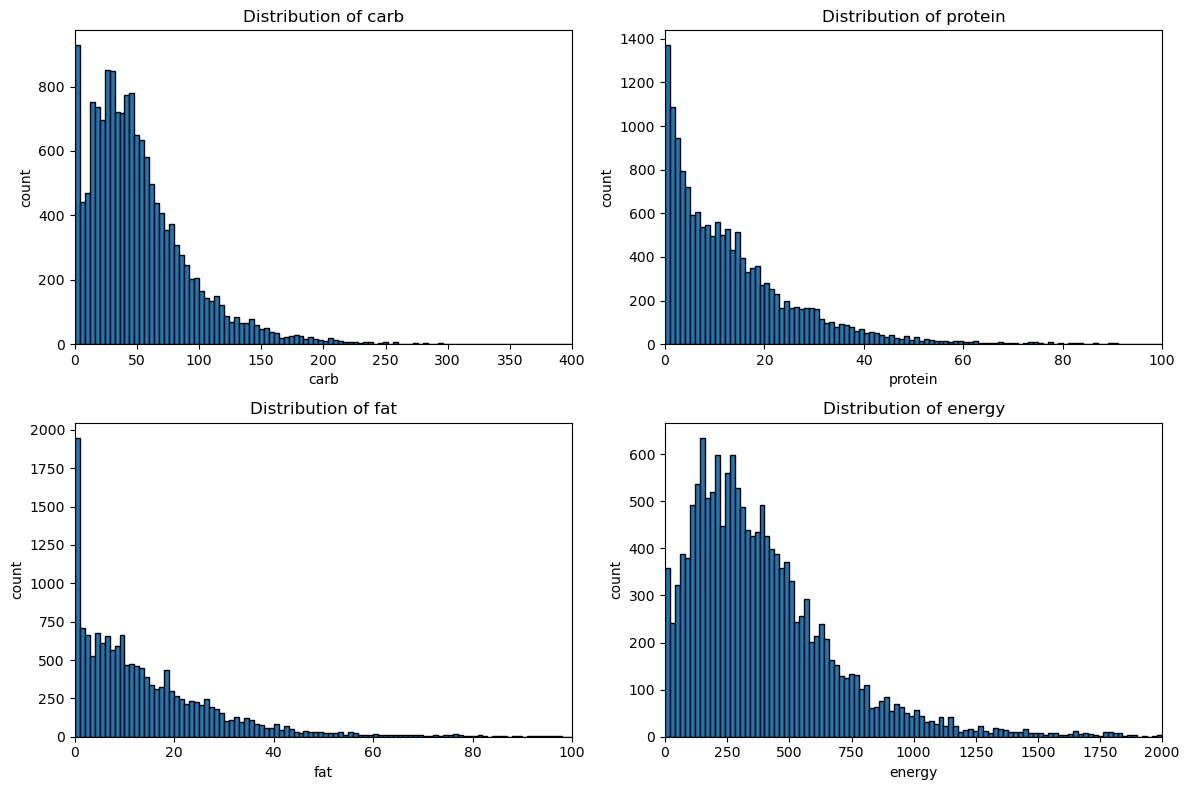

carb 220
protein 395
fat 426
energy 51


In [34]:
plot_hists("/data/lucasjia/projects/nutri/src/multi_nutrient/nb_sub_laya.csv")
plot_hists("/data/lucasjia/data/nutribench_v2_from_laya.csv")


to quantify "improvement" from adding context, use relative error reduction:
( err_no_context - err_w_context ) / err_no_context

In [76]:
def plot_err_reduction_hists(nutrient, context, path, context_path):
    df_w_context = filter_df(context_path, nutrient+context)
    df = filter_df(path, nutrient)
    df_context_compare = combine_dfs([df, df_w_context])
    df_context_compare["err_reduction"] = ((df_context_compare[nutrient+ "_mae"] - df_context_compare[nutrient+context+"_mae"]) )

    # / (df_context_compare["carb_mae"] + 0.1)) * 100
    average_improvement = df_context_compare["err_reduction"].mean()
    carb_mae = df_context_compare[nutrient+"_mae"].mean()
    carb_p_mae = df_context_compare[nutrient+context+"_mae"].mean()
    print(average_improvement)
    print(carb_mae)
    print(carb_p_mae)

    low_group = df_context_compare[df_context_compare["err_reduction"] <= 0]
    high_group = df_context_compare[df_context_compare["err_reduction"] > 0]

    # average protein values for each group
    low_mean = low_group[context].median()
    high_mean = high_group[context].median()

    print(f"Average {context} (err_reduction < 0): {low_mean:.4f}")
    print(f"Average {context} (err_reduction ≥ 0): {high_mean:.4f}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # get consistent x-axis limits
    xmin = df_context_compare[context].min()
    xmax = df_context_compare[context].max()
    bins = np.linspace(xmin, xmax, 51)

    # low group
    axes[0].hist(low_group[context].dropna(), bins=bins, edgecolor="black")
    axes[0].set_title(f"{context} distribution (err_reduction ≤ 0)")
    axes[0].set_xlim(xmin, xmax)
    axes[0].set_xlabel(f"{context} (g)")
    axes[0].set_ylabel("Count")

    # high group
    axes[1].hist(high_group[context].dropna(), bins=bins, edgecolor="black")
    axes[1].set_title(f"{context} distribution (err_reduction > 0)")
    axes[1].set_xlim(xmin, xmax)
    axes[1].set_xlabel(f"{context} (g)")

    plt.tight_layout()
    plt.show()

0.2958301886792453
14.26456603773585
13.968735849056605
Average protein (err_reduction < 0): 6.7000
Average protein (err_reduction ≥ 0): 9.3600


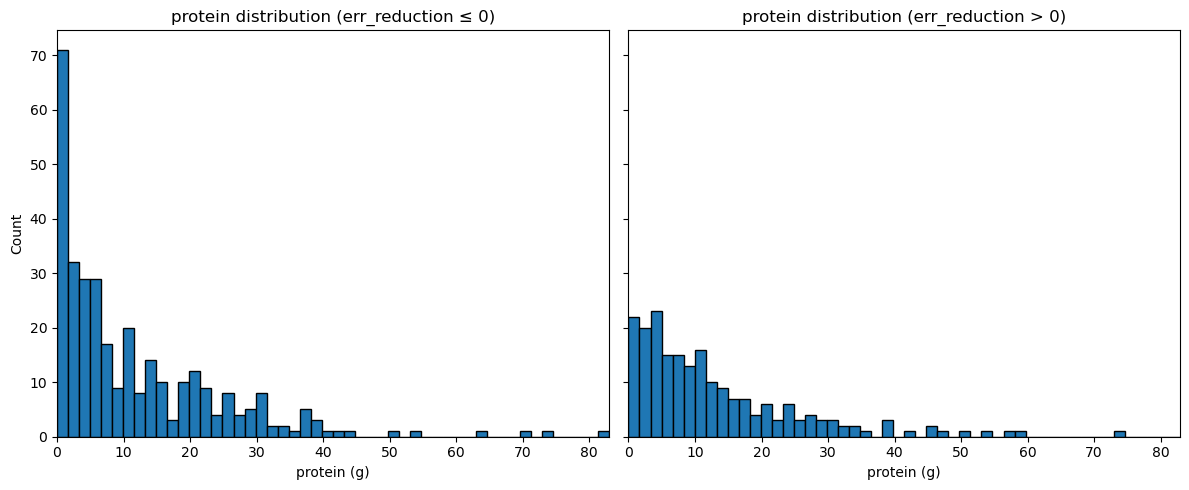

0.3771132075471697
14.26456603773585
13.88745283018868
Average fat (err_reduction < 0): 7.1000
Average fat (err_reduction ≥ 0): 10.9300


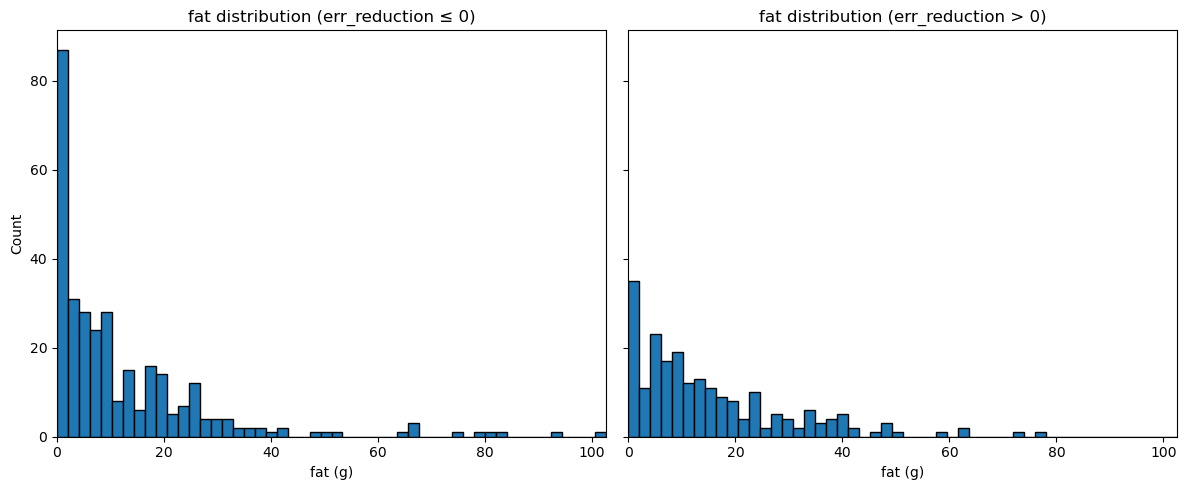

6.057264150943397
14.26456603773585
8.207301886792452
Average energy (err_reduction < 0): 287.0500
Average energy (err_reduction ≥ 0): 297.2250


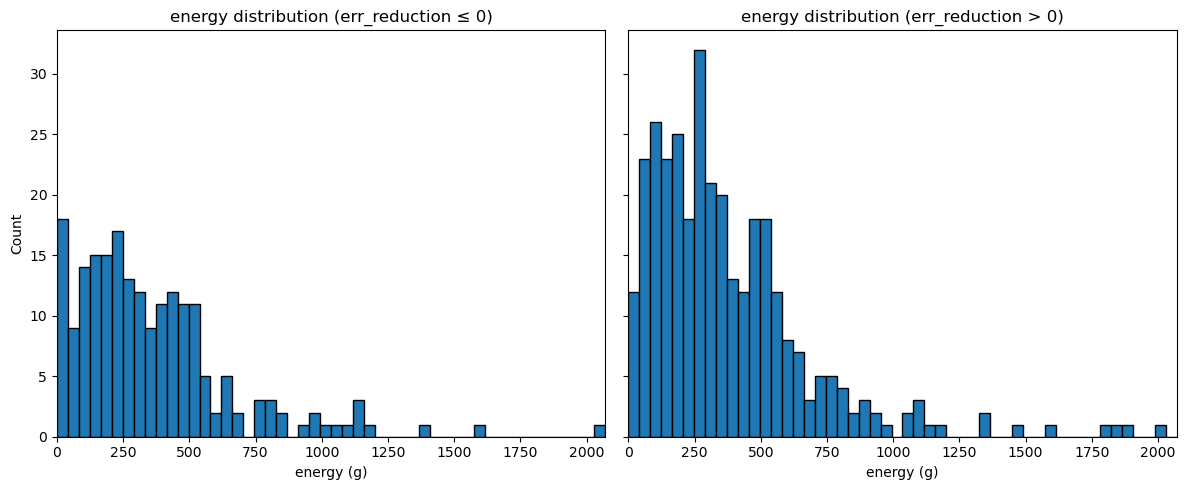

In [77]:
carb_w_protein_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1_rotations/samples_carb_base_w_protein_20250820_220352.jsonl"
carb_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1_rotations/samples_carb_base_20250821_205205.jsonl"

carb_w_fat_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1_rotations/samples_carb_base_w_fat_20250820_214655.jsonl"
carb_w_energy_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1_rotations/samples_carb_base_w_energy_20250820_050144.jsonl"


plot_err_reduction_hists("carb", "protein", carb_path, carb_w_protein_path)
plot_err_reduction_hists("carb", "fat", carb_path, carb_w_fat_path)
plot_err_reduction_hists("carb", "energy", carb_path, carb_w_energy_path)

0.9734947169811322
12.379751320754718
11.406256603773583
Average protein (err_reduction < 0): 6.3150
Average protein (err_reduction ≥ 0): 10.2200


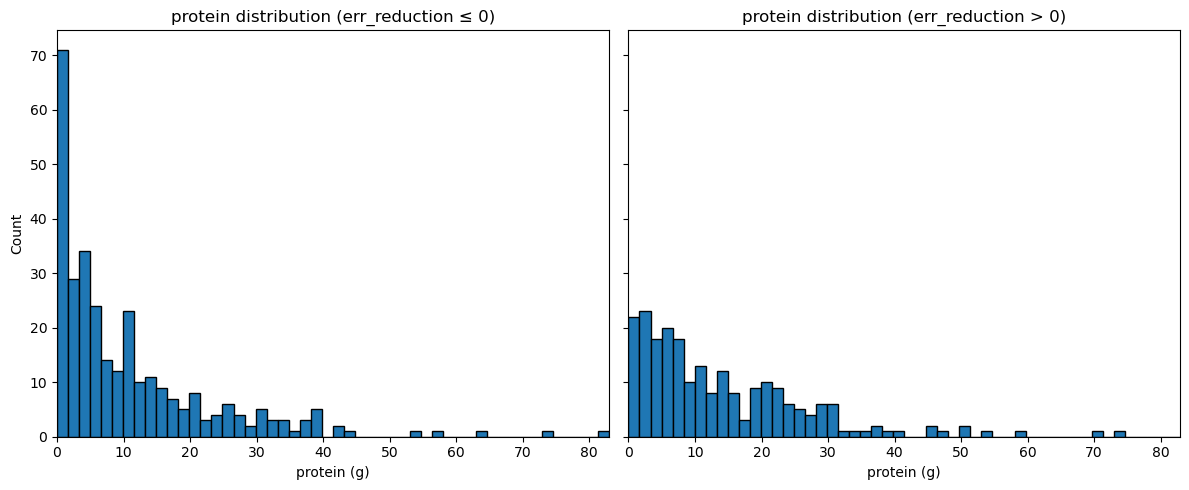

1.0747622641509433
12.379751320754718
11.304989056603773
Average fat (err_reduction < 0): 7.4200
Average fat (err_reduction ≥ 0): 9.9300


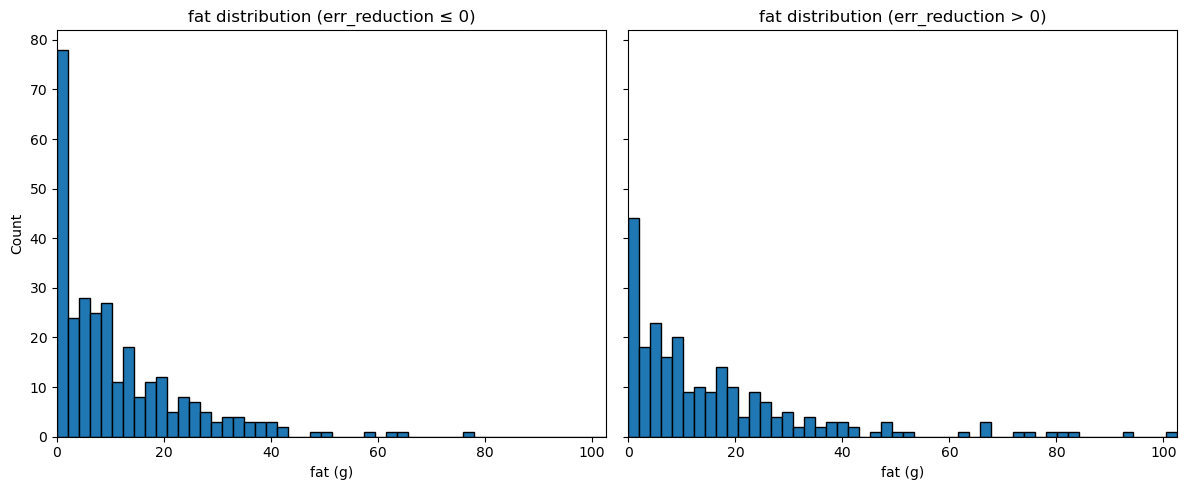

4.554936415094339
12.379751320754718
7.824814905660377
Average energy (err_reduction < 0): 260.8600
Average energy (err_reduction ≥ 0): 343.0250


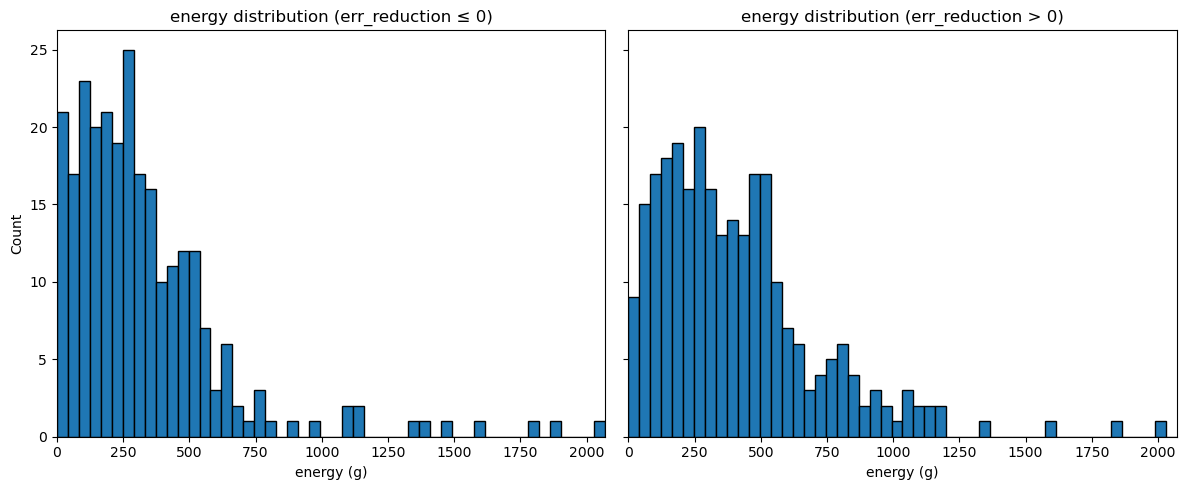

In [78]:
carb_cot_w_protein_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1_rotations/samples_carb_CoT_w_protein_20250822_054120.jsonl"
carb_cot_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1_rotations/samples_carb_CoT_20250822_182910.jsonl"
carb_cot_w_fat_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1_rotations/samples_carb_CoT_w_fat_20250822_063701.jsonl"
carb_cot_w_energy_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1_rotations/samples_carb_CoT_w_energy_20250822_165310.jsonl"


plot_err_reduction_hists("carb", "protein", carb_cot_path, carb_cot_w_protein_path)
plot_err_reduction_hists("carb", "fat", carb_cot_path, carb_cot_w_fat_path)
plot_err_reduction_hists("carb", "energy", carb_cot_path, carb_cot_w_energy_path)